In [2]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission (1).csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [5]:
#import liabrarys and default setting
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
! pip install cycler

In [19]:
from cycler import cycler


raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]
raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]
raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]
light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255

mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]

white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False


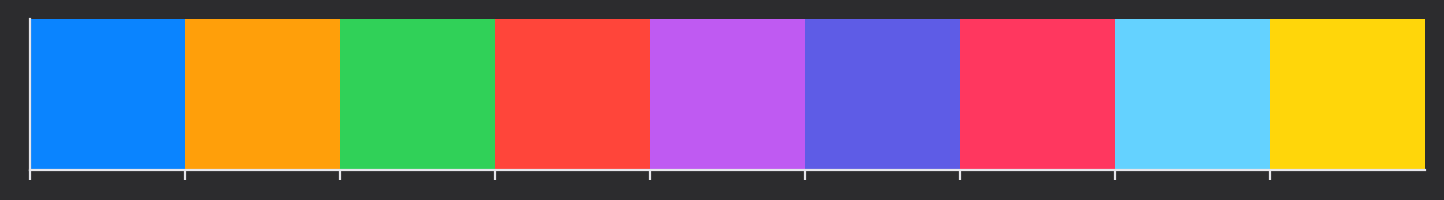

In [18]:
sns.palplot(dark_palette)

In [17]:
#dataset check
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [10]:
print(train.shape)
print(test.shape)

(100000, 52)
(50000, 51)


In [20]:
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2


In [21]:
#The id value is meaningless, so I will leave it out in advance.
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

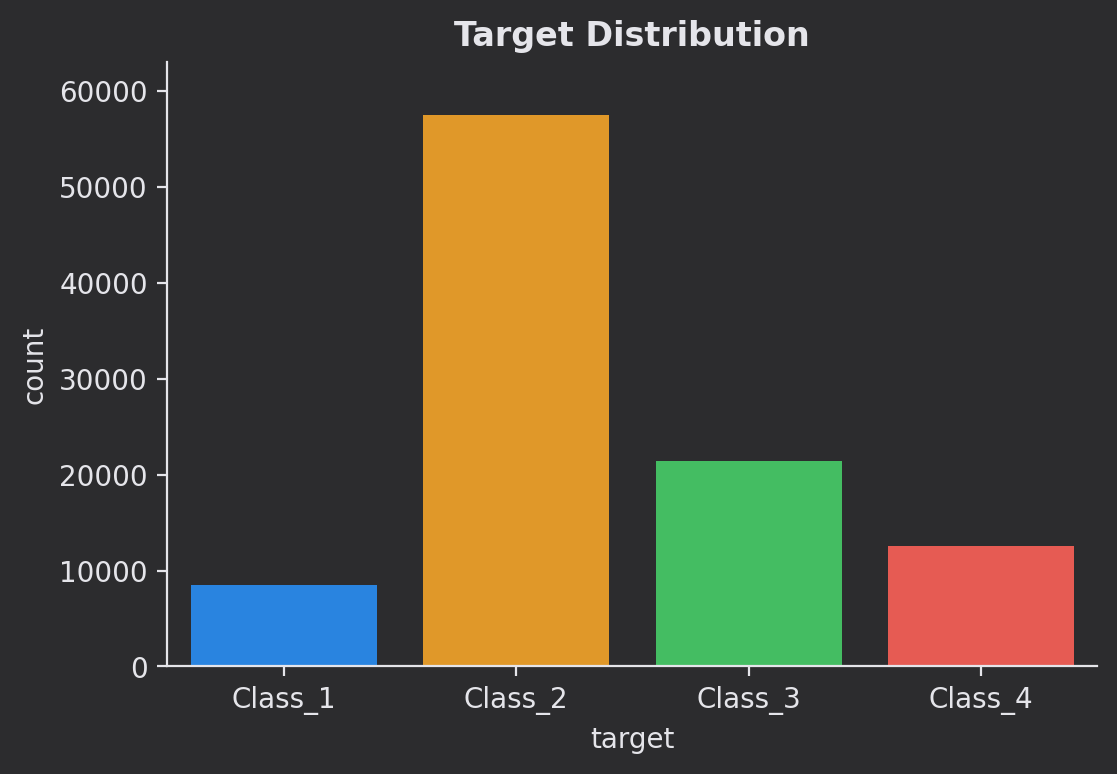

In [22]:
#target distribution
fig, ax = plt.subplots()
sns.countplot(x='target', data=train, order=sorted(train['target'].unique()), ax=ax)
ax.set_ylim(0, 63000)
ax.set_title('Target Distribution', weight='bold')
plt.show()

In [23]:
#EDA with Table

#Train Data
train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
feature_0,100000.000000,0.257830,0.929033,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,100000.000000,0.431720,1.977862,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,100000.000000,0.114130,0.519584,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,100000.000000,0.590550,1.844558,0.000000,0.000000,0.000000,0.000000,26.000000
feature_4,100000.000000,0.599770,2.785531,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,0.160820,0.601149,0.000000,0.000000,0.000000,0.000000,10.000000
feature_6,100000.000000,0.731490,2.343465,0.000000,0.000000,0.000000,0.000000,27.000000
feature_7,100000.000000,1.228920,2.692732,0.000000,0.000000,0.000000,1.000000,31.000000
feature_8,100000.000000,0.903350,3.415258,0.000000,0.000000,0.000000,0.000000,39.000000
feature_9,100000.000000,0.940120,1.904172,0.000000,0.000000,0.000000,1.000000,17.000000


In [24]:
#Test data
test.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
feature_0,50000.000000,0.254620,0.910607,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,50000.000000,0.443480,2.004536,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,50000.000000,0.116720,0.524807,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,50000.000000,0.584440,1.814083,0.000000,0.000000,0.000000,0.000000,25.000000
feature_4,50000.000000,0.612640,2.819580,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,50000.000000,0.161500,0.605760,0.000000,0.000000,0.000000,0.000000,9.000000
feature_6,50000.000000,0.746000,2.352495,0.000000,0.000000,0.000000,0.000000,25.000000
feature_7,50000.000000,1.238040,2.728055,0.000000,0.000000,0.000000,1.000000,29.000000
feature_8,50000.000000,0.886440,3.364154,0.000000,0.000000,0.000000,0.000000,35.000000
feature_9,50000.000000,0.941920,1.913358,0.000000,0.000000,0.000000,1.000000,16.000000


In [25]:
#comparision of statistics of train and test
def diff_color(x):
    color = 'red' if x<0 else ('green' if x > 0 else 'black')
    return f'color: {color}'

(train.describe() - test.describe())[test.columns].T.iloc[:,1:].style\
        .bar(subset=['mean', 'std'], align='mid', color=['#d65f5f', '#5fba7d'])\
        .applymap(diff_color, subset=['min', 'max'])

,mean,std,min,25%,50%,75%,max
feature_0,0.003210,0.018426,0.000000,0.000000,0.000000,0.000000,0.000000
feature_1,-0.011760,-0.026675,0.000000,0.000000,0.000000,0.000000,0.000000
feature_2,-0.002590,-0.005223,0.000000,0.000000,0.000000,0.000000,0.000000
feature_3,0.006110,0.030476,0.000000,0.000000,0.000000,0.000000,1.000000
feature_4,-0.012870,-0.034049,0.000000,0.000000,0.000000,0.000000,0.000000
feature_5,-0.000680,-0.004611,0.000000,0.000000,0.000000,0.000000,1.000000
feature_6,-0.014510,-0.009031,0.000000,0.000000,0.000000,0.000000,2.000000
feature_7,-0.009120,-0.035323,0.000000,0.000000,0.000000,0.000000,2.000000
feature_8,0.016910,0.051104,0.000000,0.000000,0.000000,0.000000,4.000000
feature_9,-0.001800,-0.009186,0.000000,0.000000,0.000000,0.000000,1.000000


Summary

1-No missing data
2- The scale of the mean and deviation varies.
3- The median is mostly 0, and there are 2 columns with median 1.
4-The representative statistics of train and test are almost similar.

5- There is no significant difference between the mean and the deviation.

There are cases where the minimum value and the maximum value are different, which means that the feature range of the test may be different in the train.

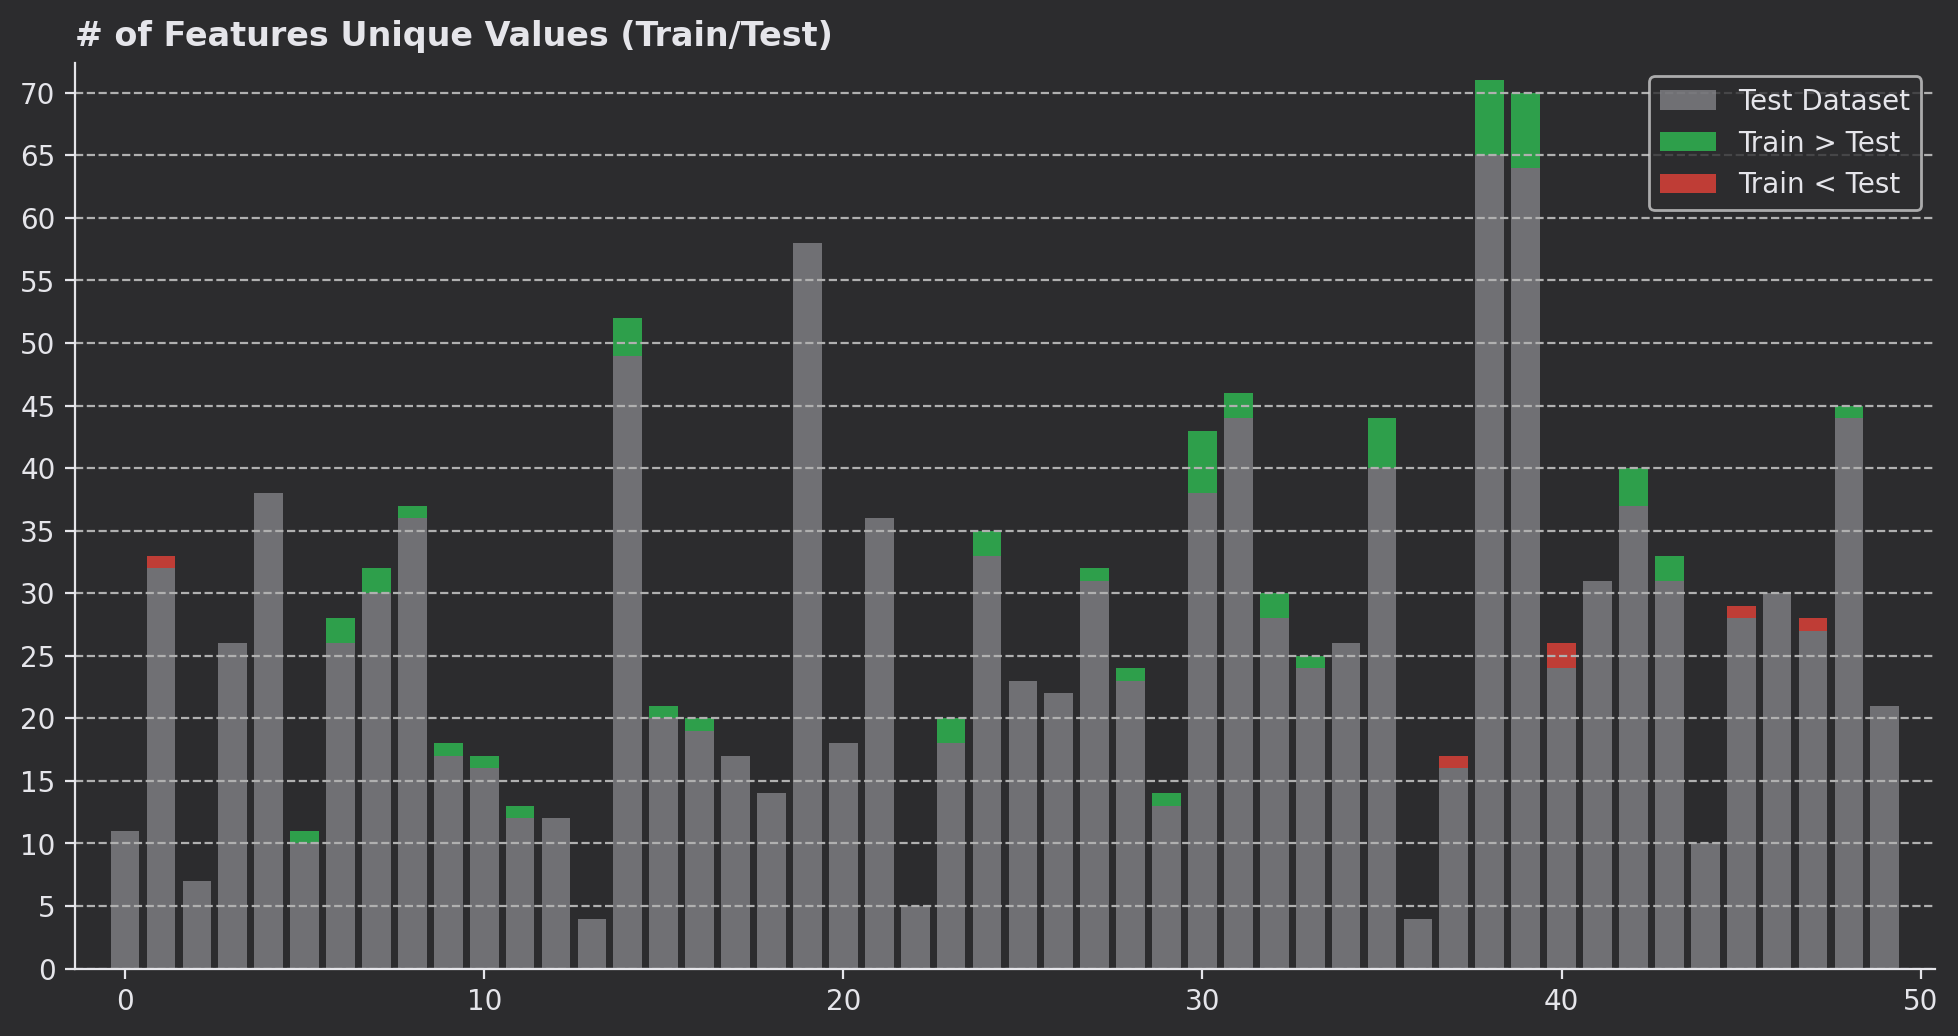

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

y = np.array([train[f'feature_{i}'].nunique() for i in range(50)])
y2 = np.array([test[f'feature_{i}'].nunique() for i in range(50)])
comp = y-y2

ax.bar(range(50), y2, alpha=0.7, color=gray_dark_palette[0], label='Test Dataset')
# Thanks to @rahulchauhan3j to fix typo
ax.bar(range(50),  comp*(comp>0), bottom=y2, color=dark_palette[2], alpha=0.7, label='Train > Test')
ax.bar(range(50), comp*(comp<0), bottom=y2-comp*(comp<0), color=dark_palette[3], alpha=0.7, label='Train < Test')

ax.set_yticks(range(0, 80, 5))
ax.margins(0.02)
ax.grid(axis='y', linestyle='--', zorder=5)
ax.set_title('# of Features Unique Values (Train/Test)', loc='left', fontweight='bold')
ax.legend()
plt.show()

All data in the dataset are integers. Then, a rough look at the number of each integer is as follows.


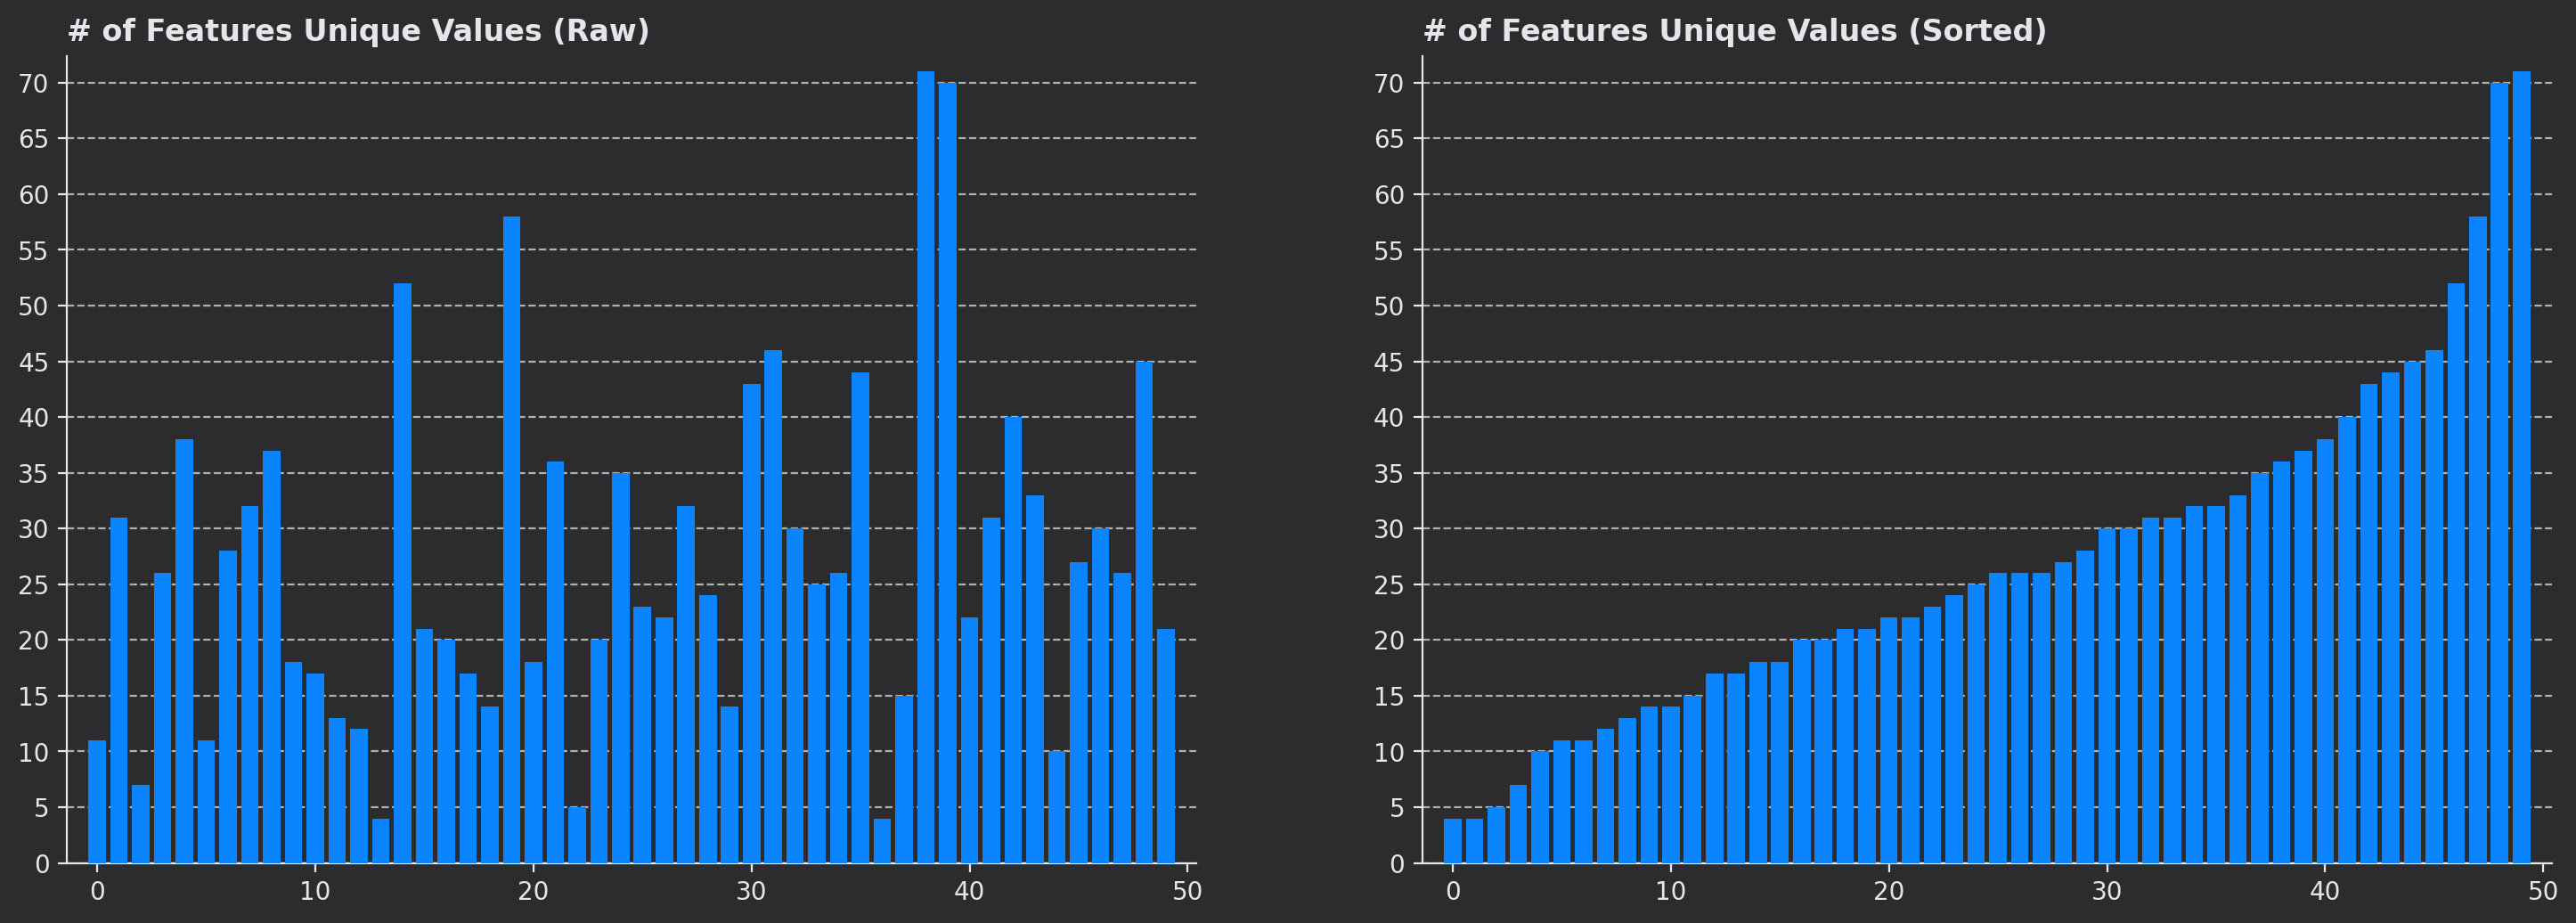

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

y = [train[f'feature_{i}'].nunique() for i in range(50)]

for ax in axes:
    ax.bar(range(50), y, zorder=10)
    ax.set_yticks(range(0, 80, 5))
    ax.margins(0.02)
    ax.grid(axis='y', linestyle='--', zorder=5)
    y.sort()

axes[0].set_title('# of Features Unique Values (Raw)', loc='left', fontweight='bold')
axes[1].set_title('# of Features Unique Values (Sorted)', loc='left', fontweight='bold')

plt.show()

AttributeError: ignored

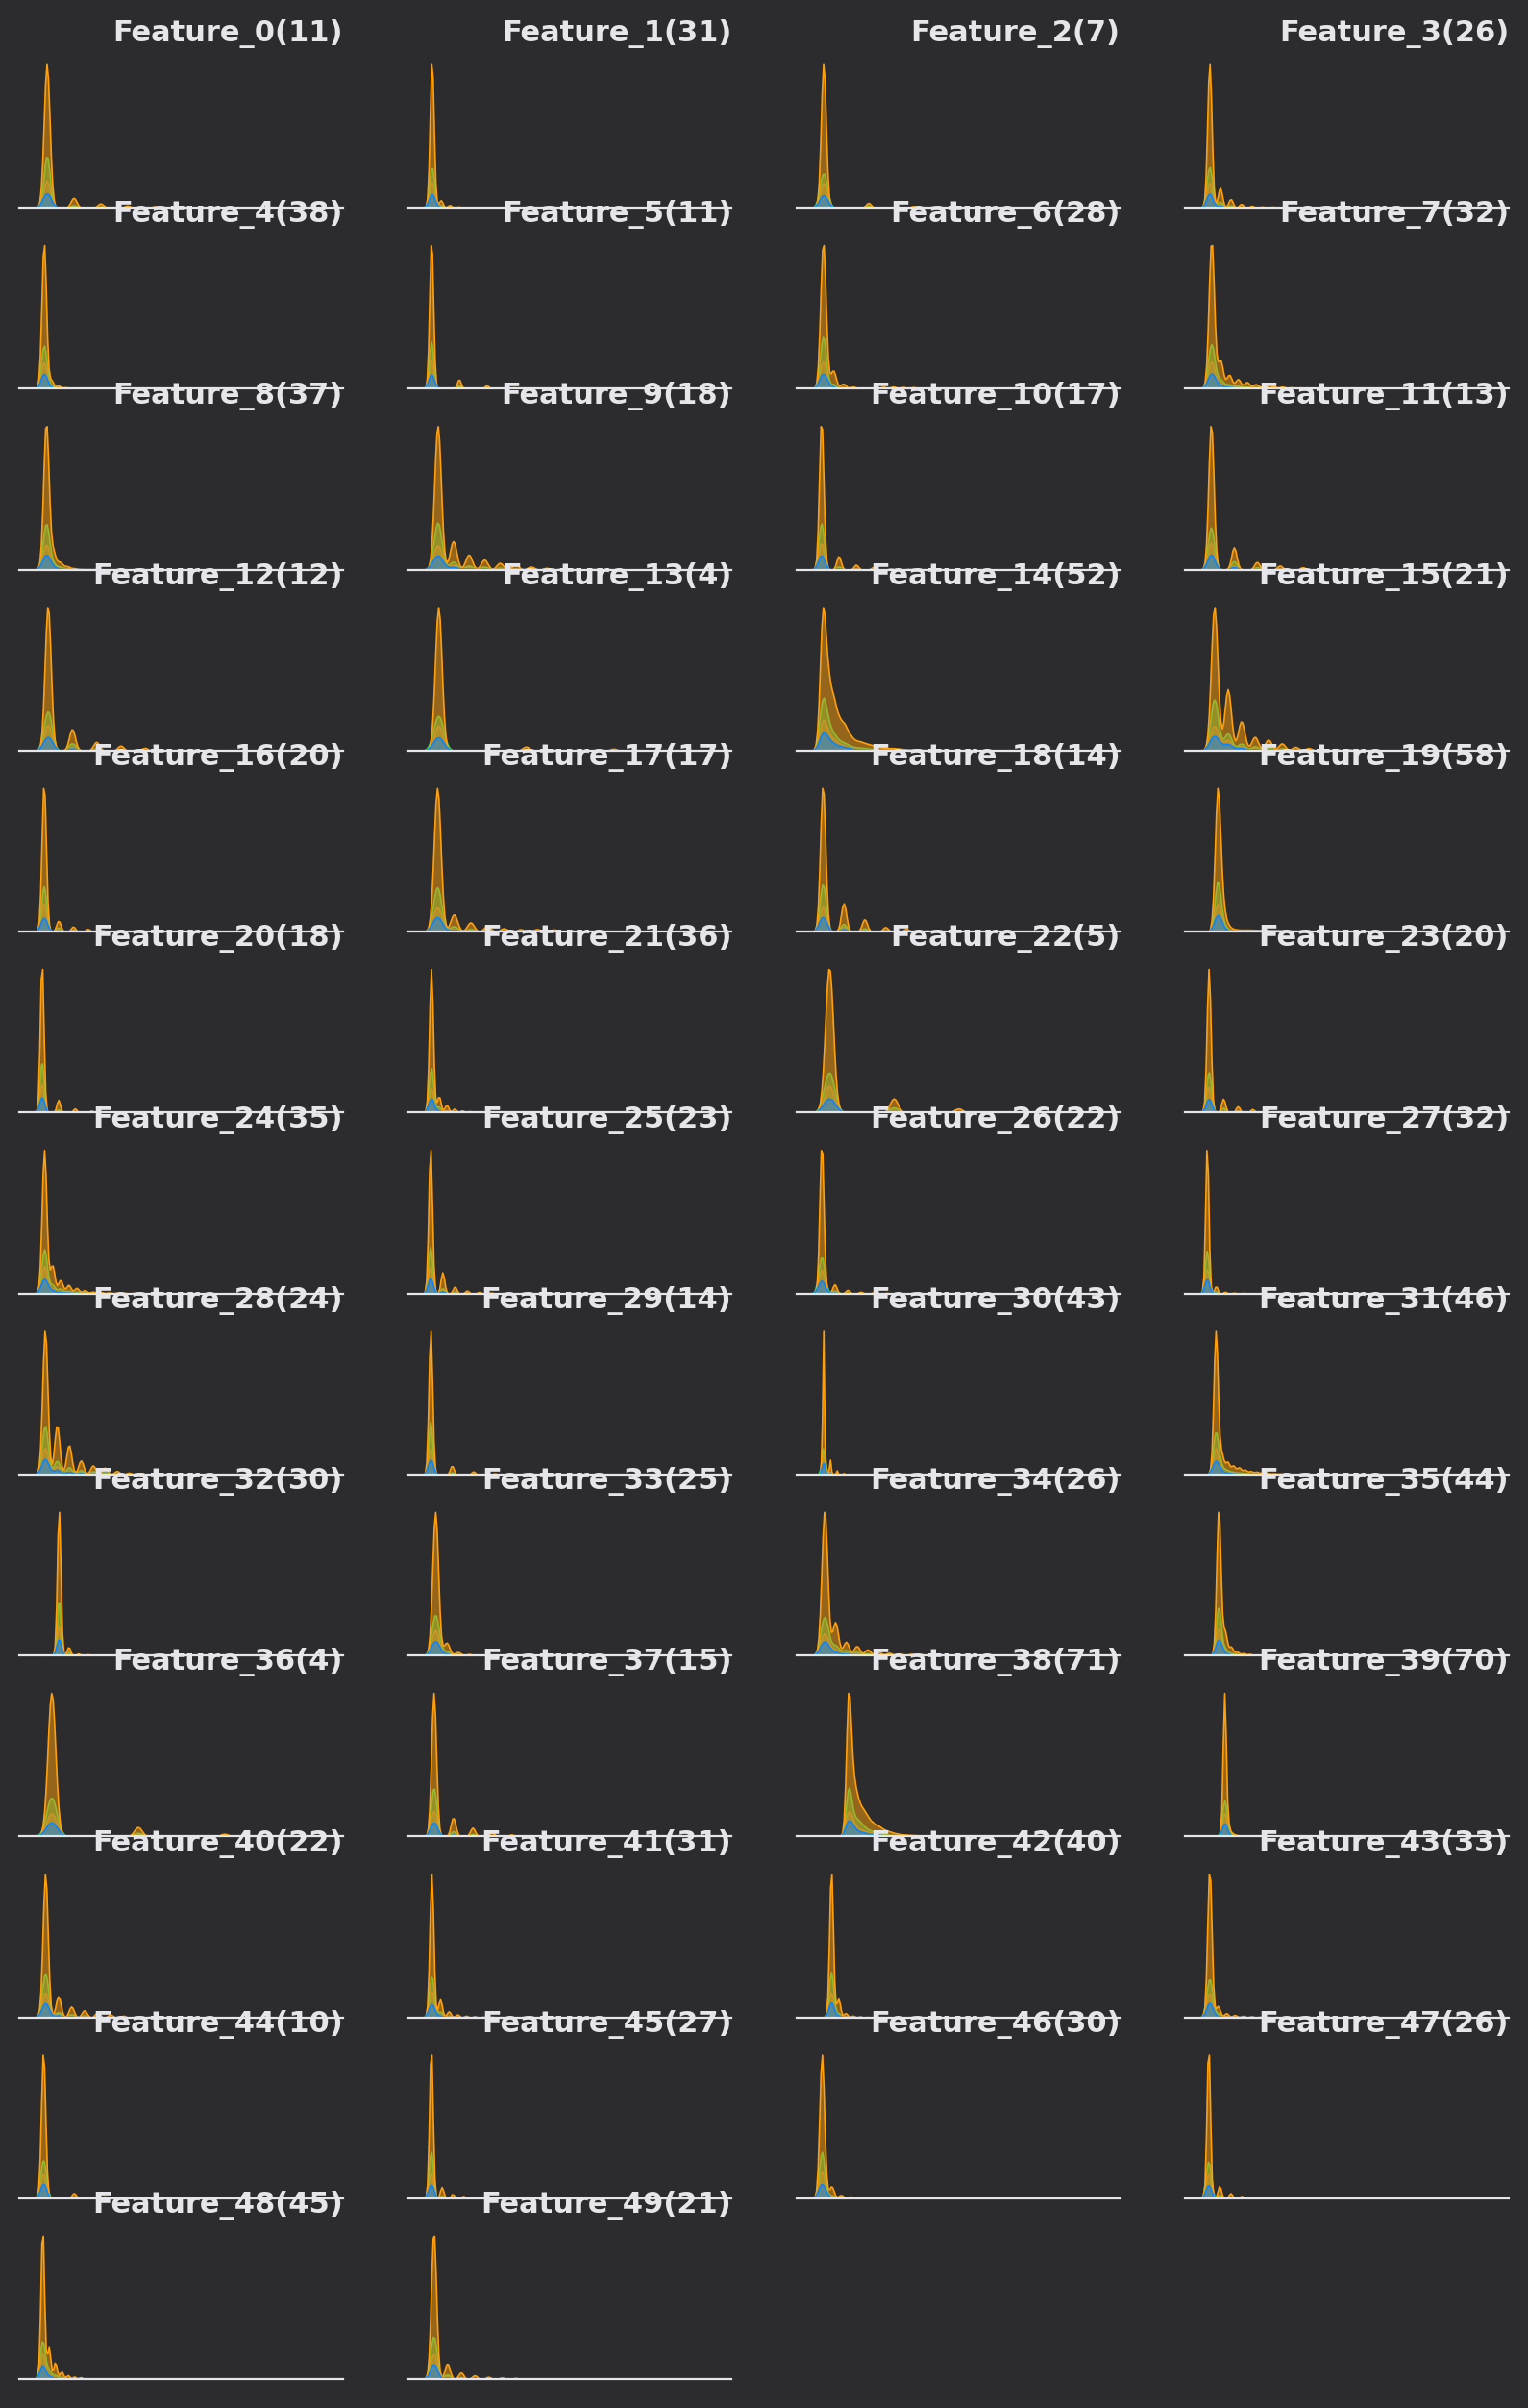

In [28]:
#Distribution check
fig, axes = plt.subplots(13, 4, figsize=(10, 16))

target_order = sorted(train['target'].unique())
for idx, ax in zip(range(50), axes.flatten()):
    cnt = train[f'feature_{idx}'].value_counts().sort_index()
    sns.kdeplot(x=f'feature_{idx}', 
                hue='target', hue_order=target_order,
                data=train,
                alpha=0.5, 
                linewidth=0.6, fill=True,
                legend=False,
                ax=ax)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    cnt = len(train[f'feature_{idx}'].unique())
    ax.set_title(f'Feature_{idx}({cnt})', loc='right', weight='bold', fontsize=11)

    axes.flatten()[-1].axis('off')    
axes.flatten()[-2].axis('off')

fig.supxlabel('Distribution by class (by feature)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

AttributeError: ignored

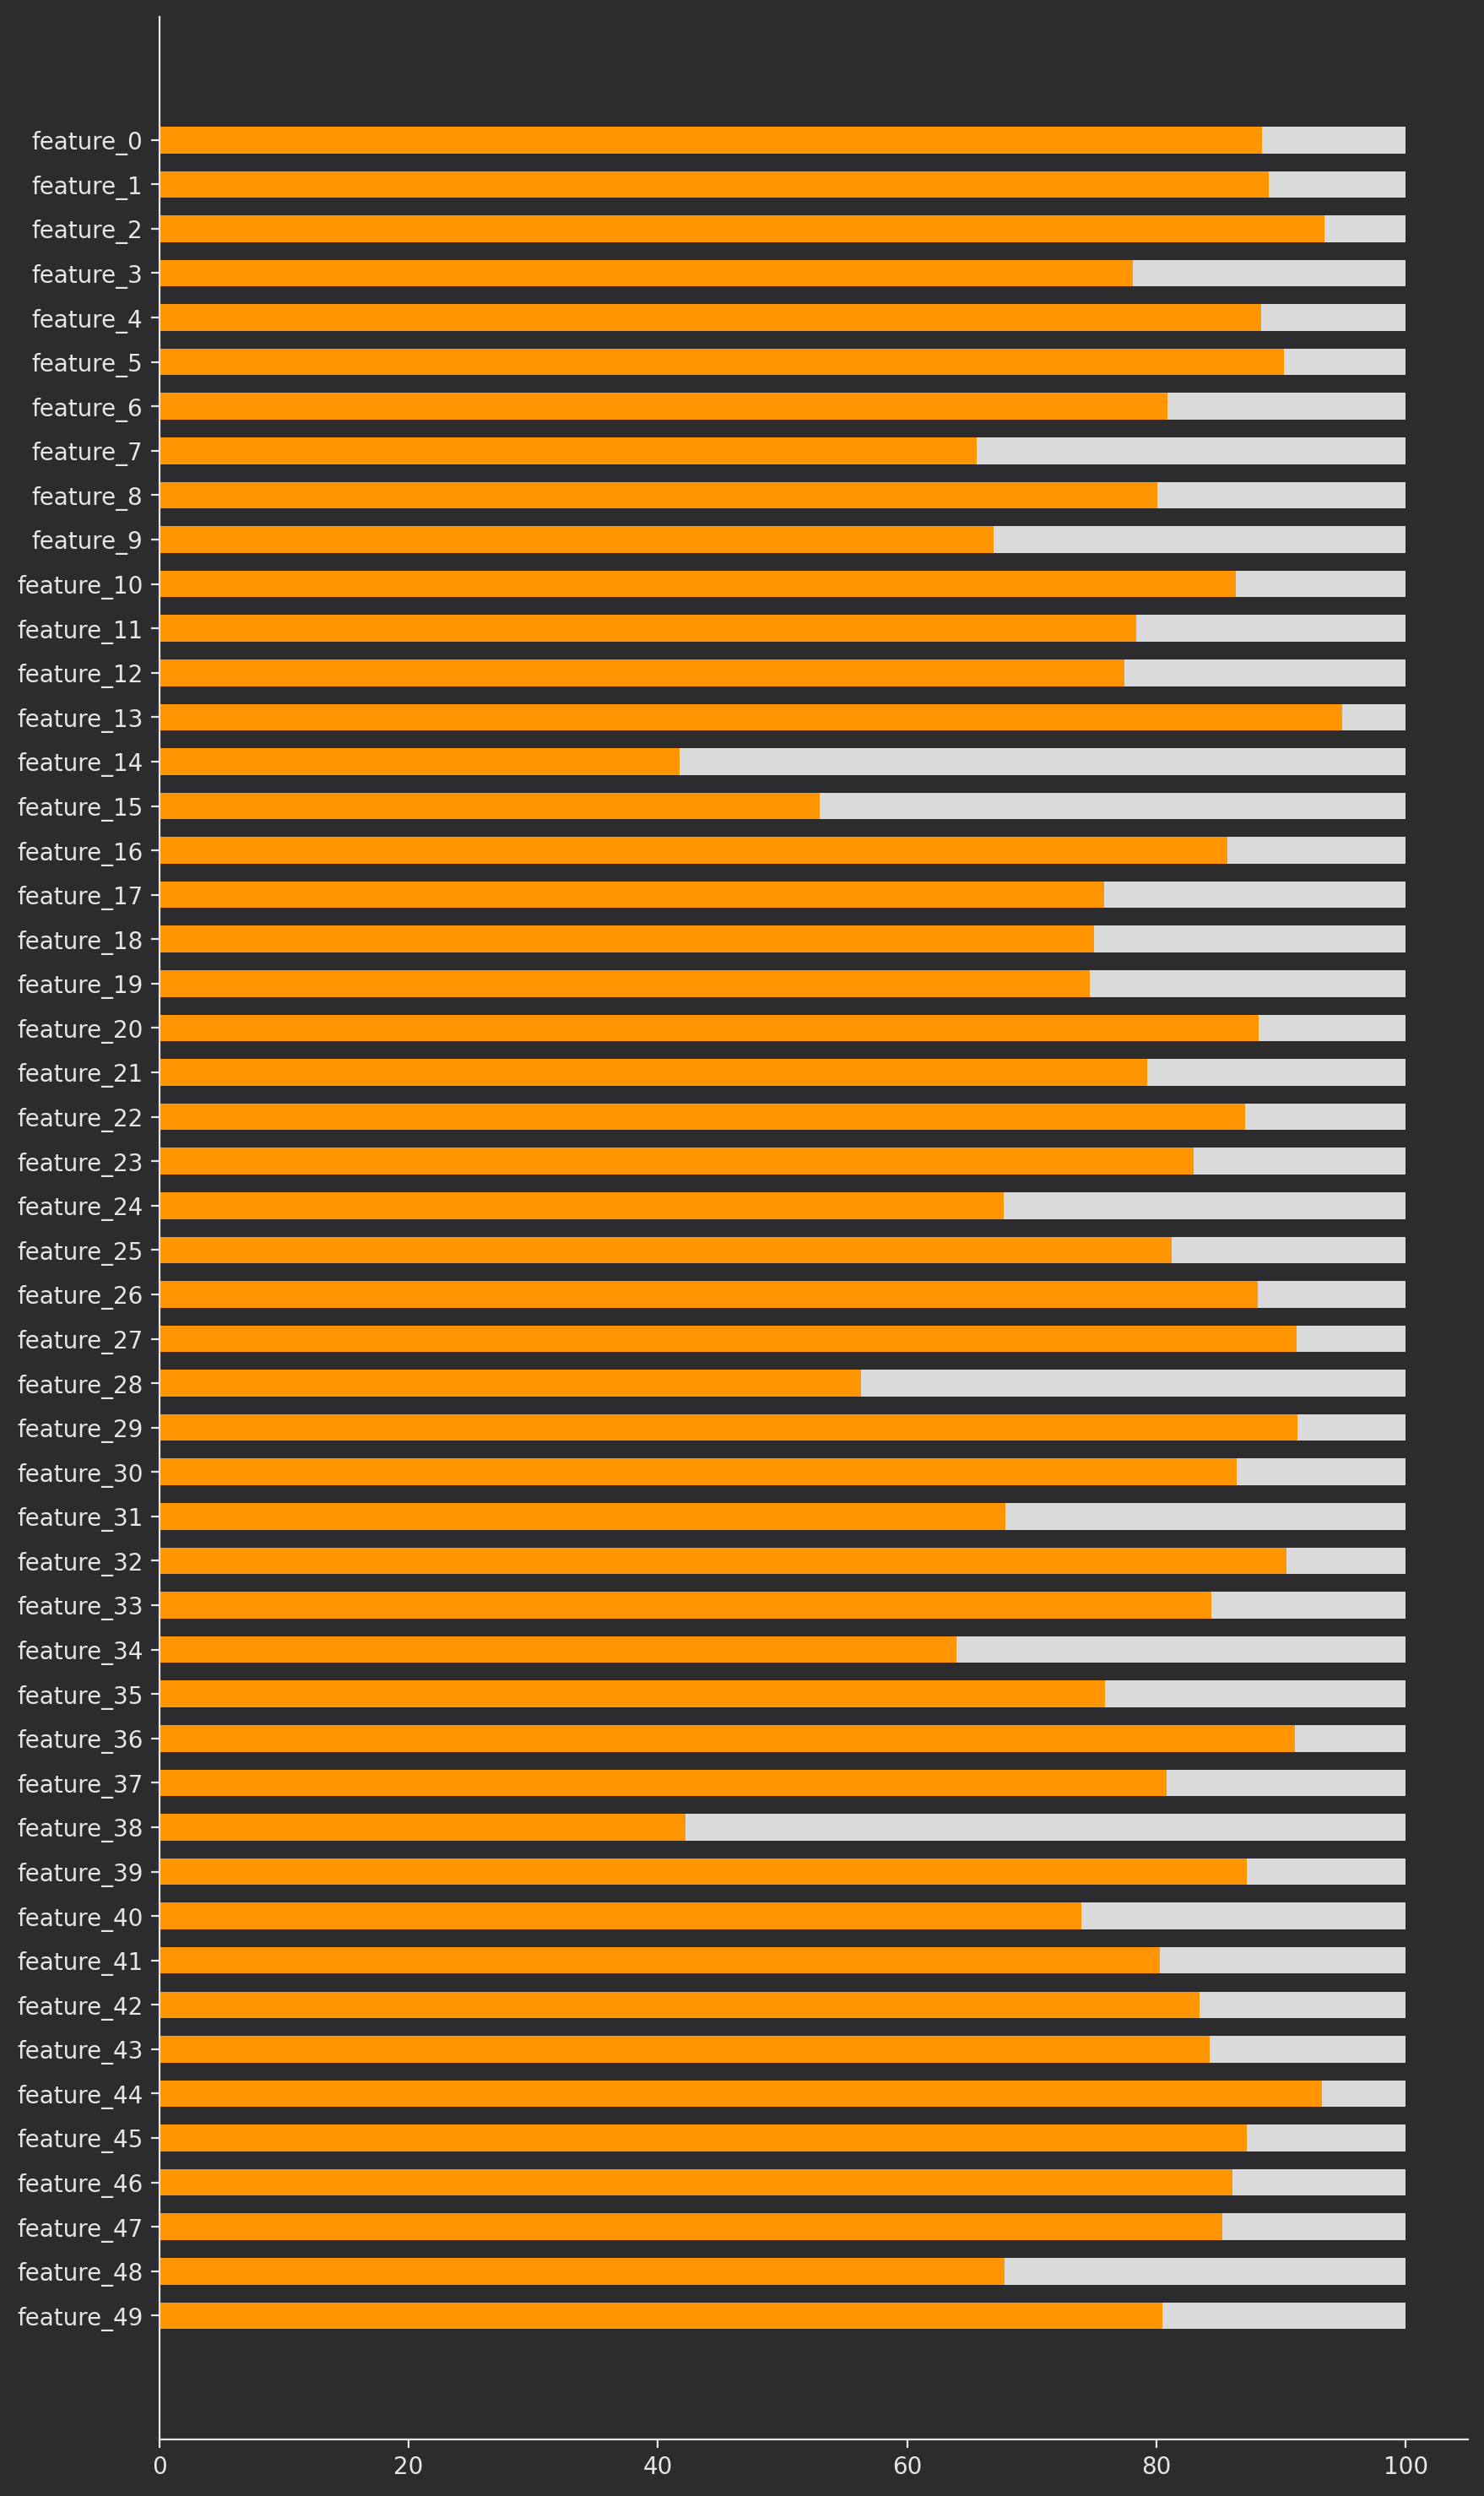

In [29]:
zero_data = ((train.iloc[:,:50]==0).sum() / len(train) * 100)[::-1]
fig, ax = plt.subplots(1,1,figsize=(10, 19))

ax.barh(zero_data.index, 100, color='#dadada', height=0.6)
barh = ax.barh(zero_data.index, zero_data, color=light_palette[1], height=0.6)
ax.bar_label(barh, fmt='%.01f %%', color='black')
ax.spines[['left', 'bottom']].set_visible(False)

ax.set_xticks([])

ax.set_title('# of Zeros (by feature)', loc='center', fontweight='bold', fontsize=15)    
plt.show()

AttributeError: ignored

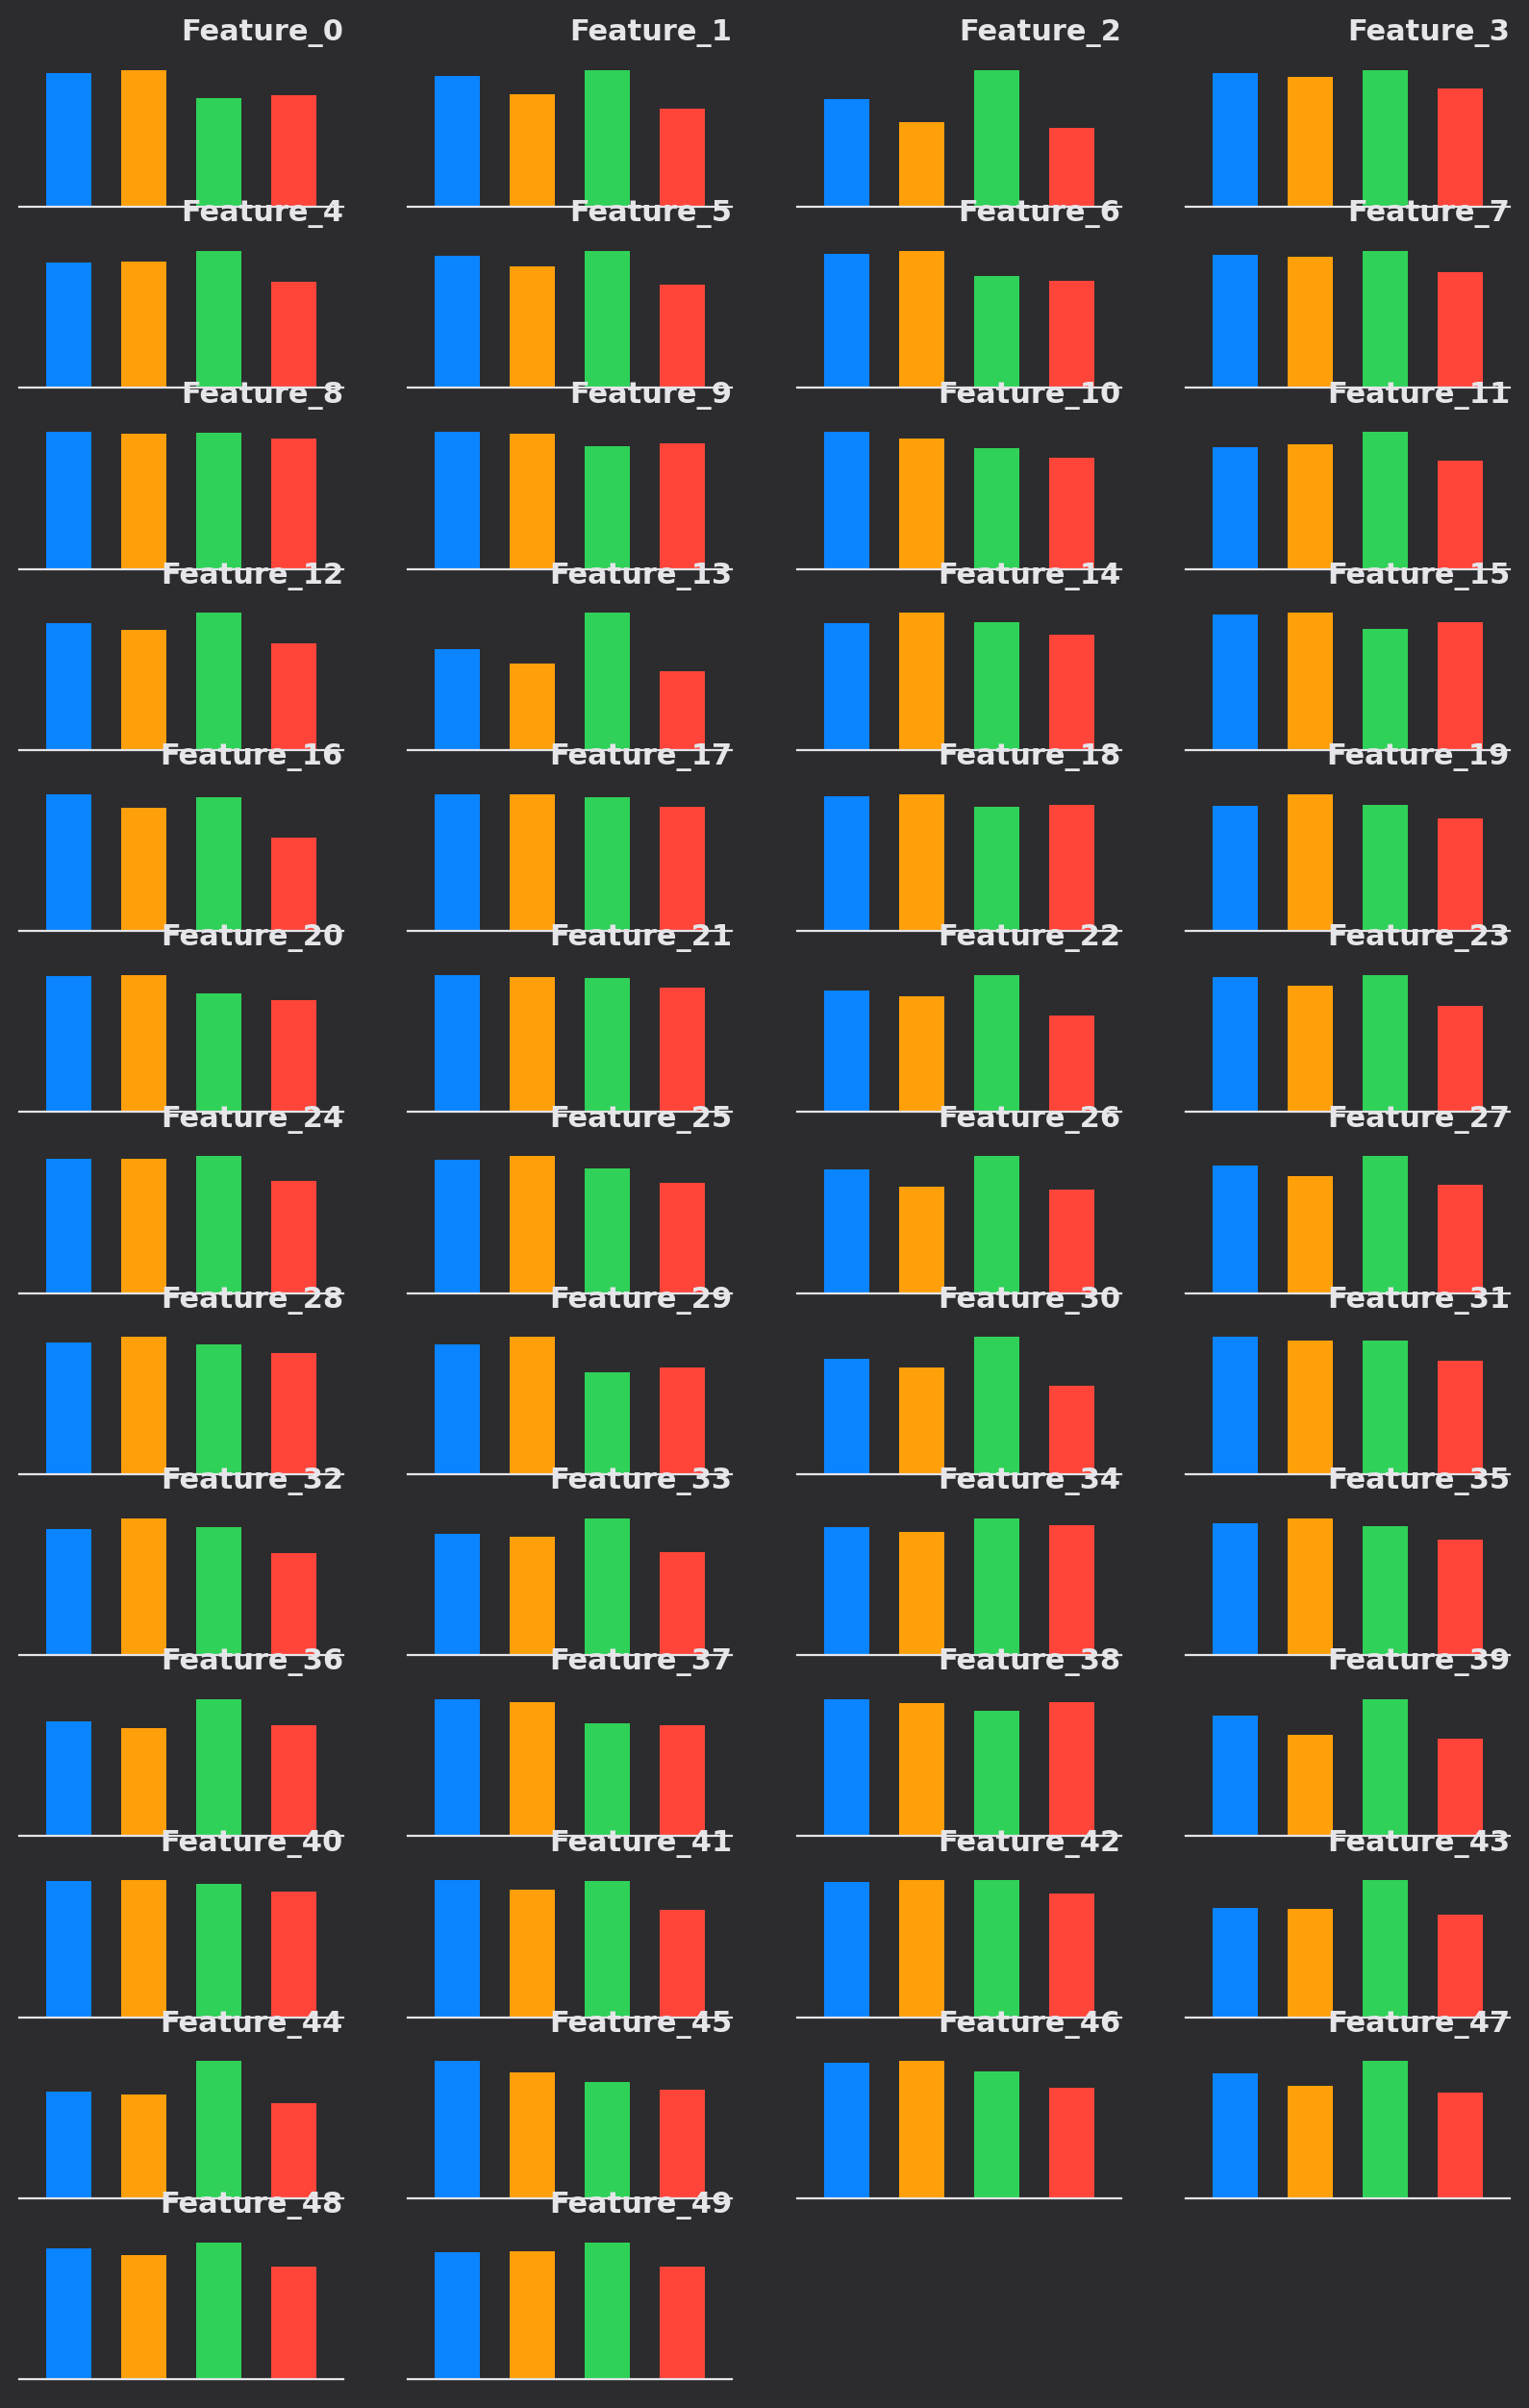

In [20]:
fig, axes = plt.subplots(13, 4, figsize=(10, 16))

target_order = sorted(train['target'].unique())
mean = train.groupby('target').mean().sort_index()
std = train.groupby('target').std().sort_index()

for idx, ax in zip(range(50), axes.flatten()):
    ax.bar(mean[f'feature_{idx}'].index, mean[f'feature_{idx}'], 
           color=dark_palette[:4], width=0.6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.margins(0.1)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'Feature_{idx}', loc='right', weight='bold', fontsize=11)
    axes.flatten()[-1].axis('off')    
axes.flatten()[-2].axis('off')

fig.supxlabel('Average by class (by feature)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

In [30]:
#Correlation
label_dict = {val:idx for idx, val in enumerate(sorted(train['target'].unique()))}
train['target'] = train['target'].map(label_dict)


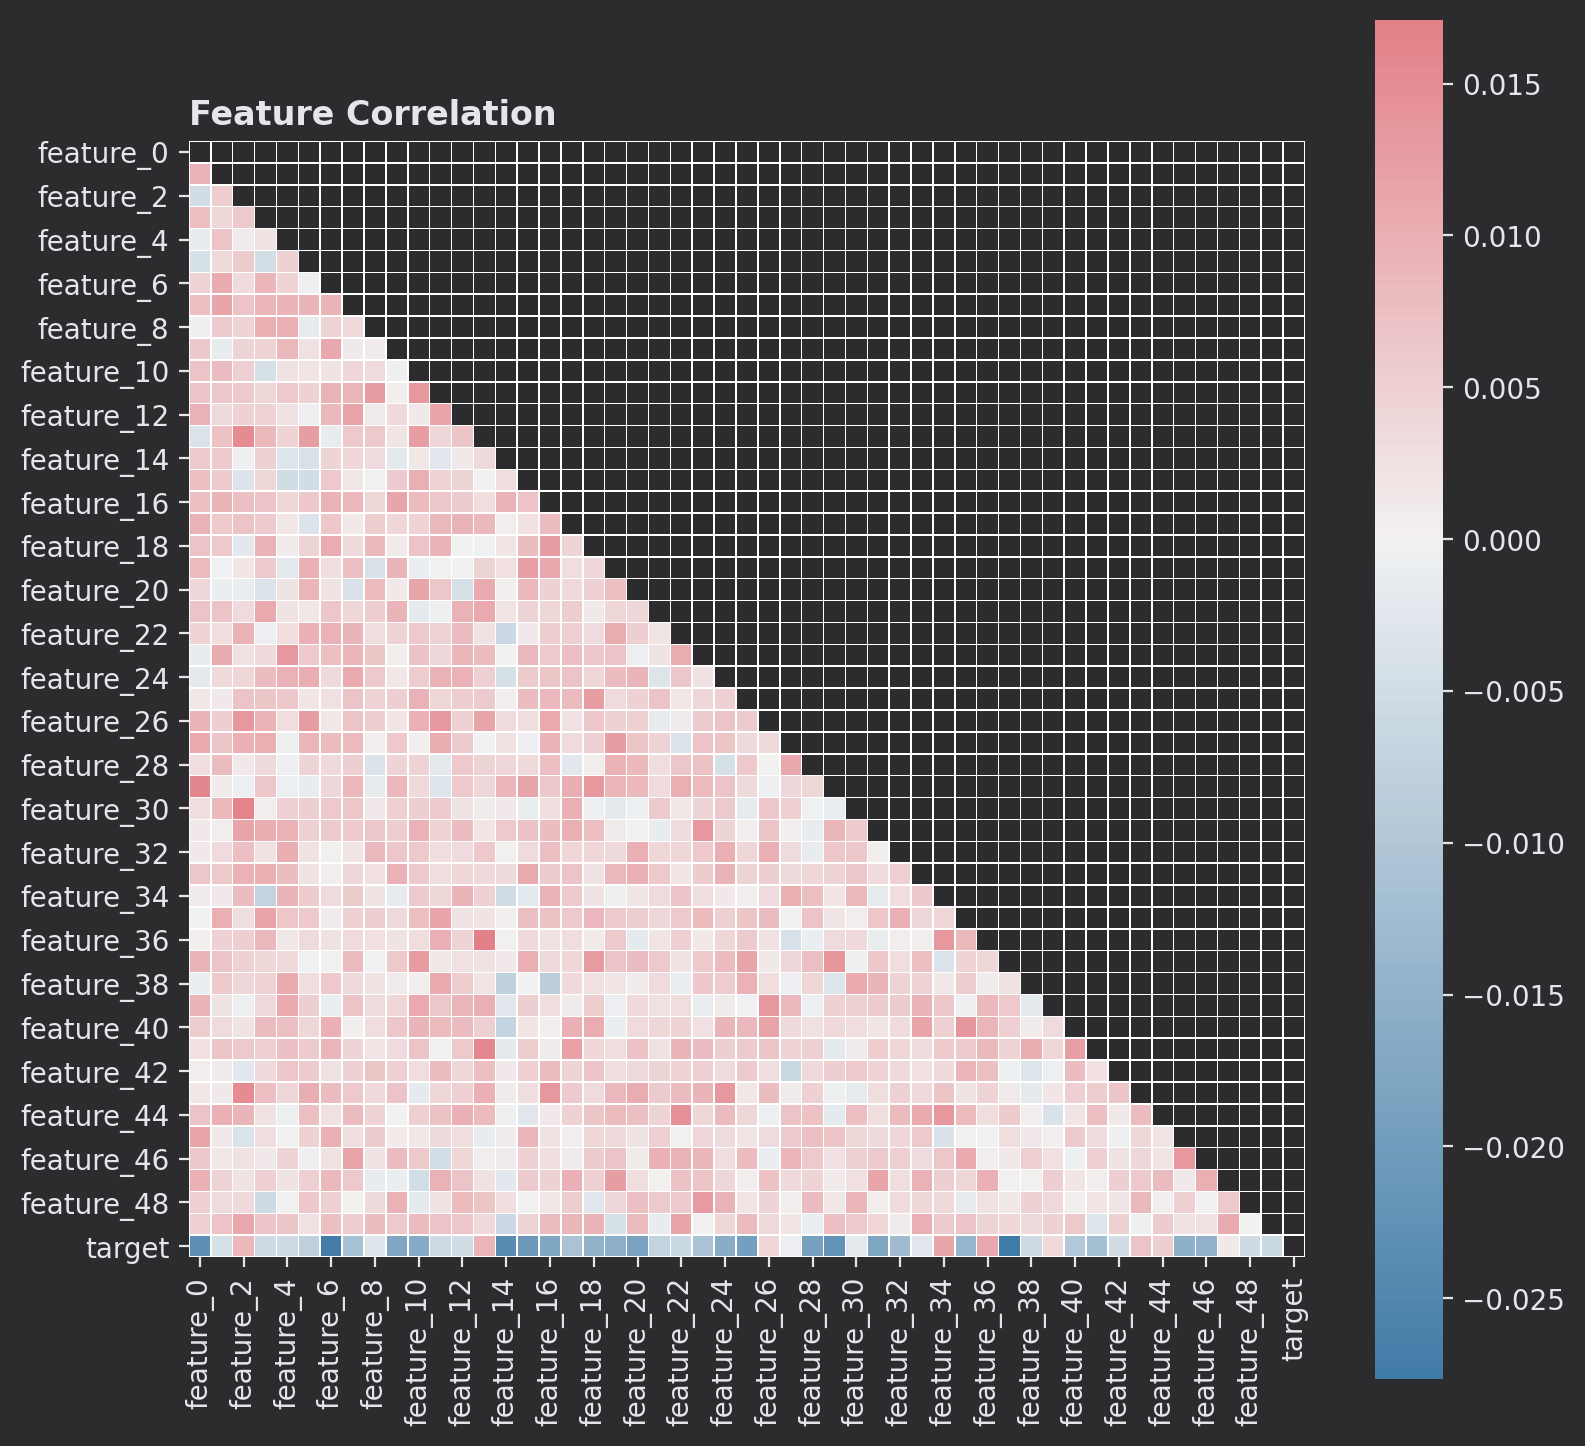

In [31]:
fig, ax = plt.subplots(figsize=(9 , 9))

corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(corr,
        square=True, center=0, linewidth=0.2,
        cmap=sns.diverging_palette(240, 10, as_cmap=True),
        mask=mask, ax=ax) 

ax.set_title('Feature Correlation', loc='left', fontweight='bold')
plt.show()

In [43]:

!pip install numpy matplotlib seaborn umap-learn

     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 1.2MB 29.5MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=91fd48816dc53885d5ce1f4cf159fa2d3db95dd2adfb35187d523f9caf580065
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=9908fe61cd31e2123bc30123f3d97a8d52c60f6cea14d777ea973de71652ebf8
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [32]:

#dimension reducing with samplingfrom umap 
import umap

from umap import UMAP

train_sub = train.sample(10000, random_state=0)
target = train_sub['target']
umap = UMAP(random_state=0)
dr = umap.fit_transform(train_sub.iloc[:,:-1], target)



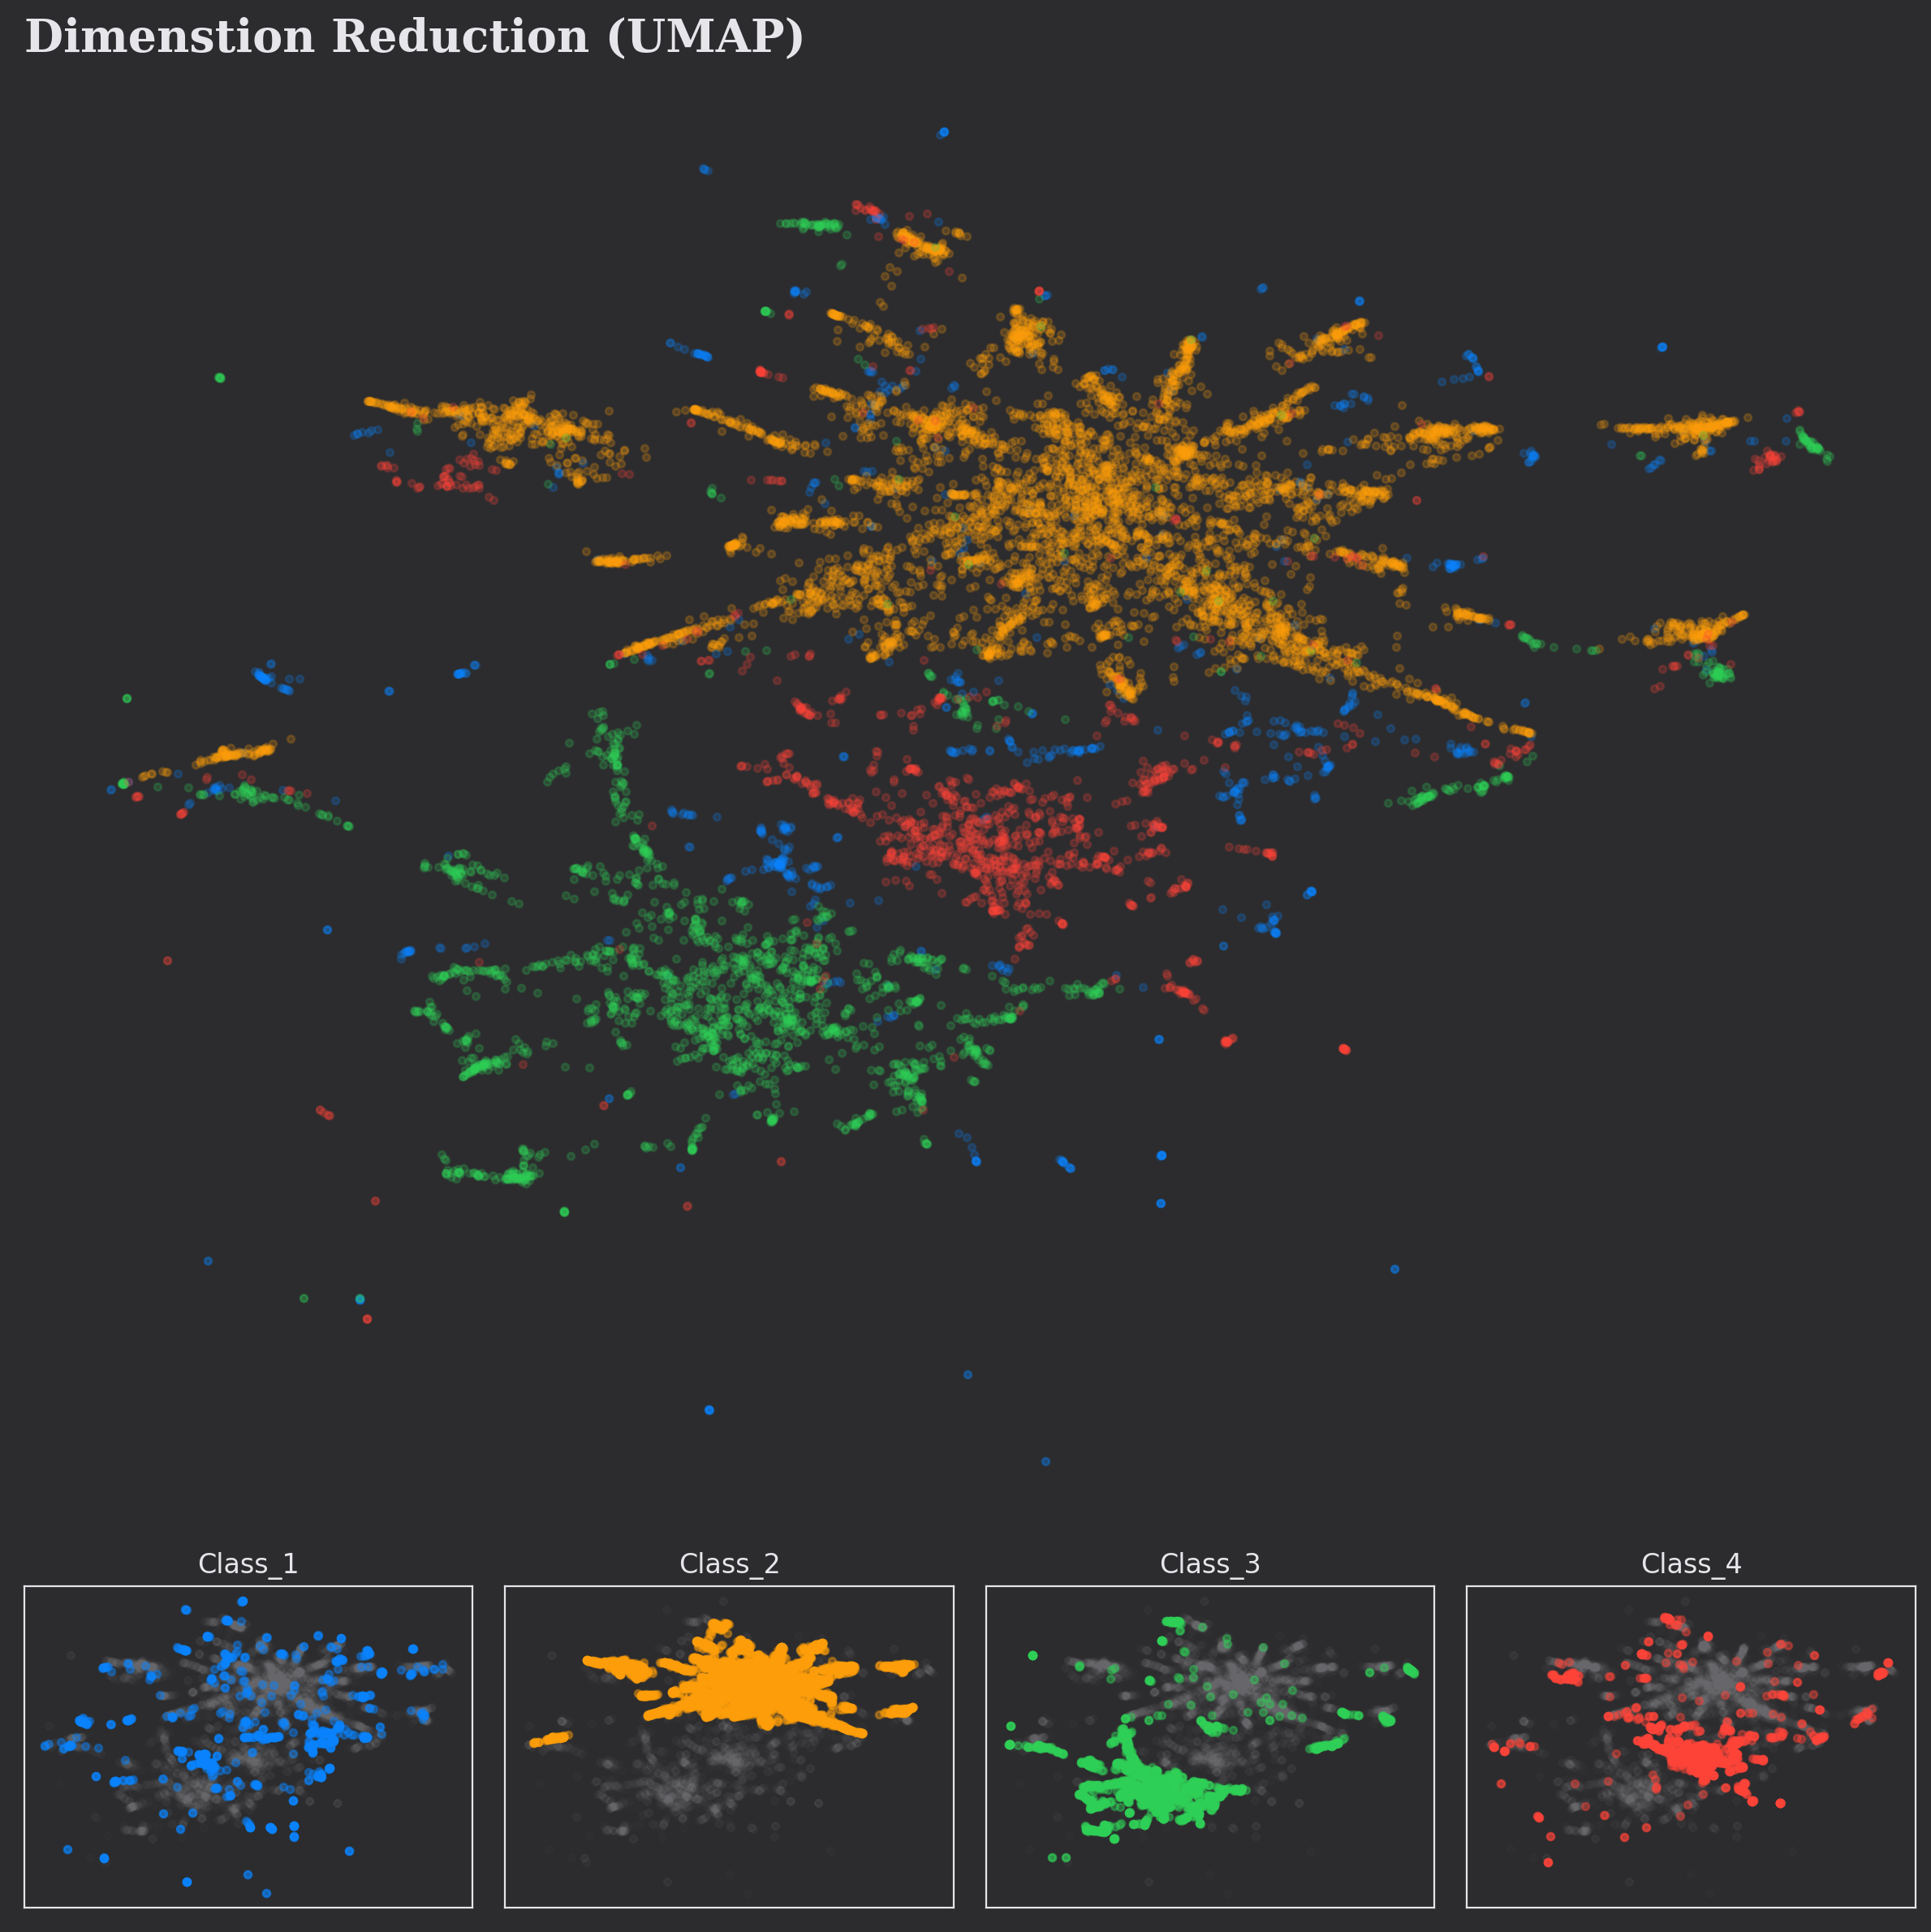

In [33]:
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(5, 4)
ax = fig.add_subplot(gs[:-1,:])

sub_axes = [None] * 4
for idx in range(4): 
    sub_axes[idx] = fig.add_subplot(gs[-1,idx])

for idx in range(4):
    ax.scatter(x=dr[:,0][target==idx], y=dr[:,1][target==idx],
              s=10, alpha=0.2
              )
    for j in range(4):
        sub_axes[j].scatter(x=dr[:,0][target==idx], y=dr[:,1][target==idx],
                              s=10, alpha = 0.4 if idx==j else 0.008, color = (dark_palette[j%9]) if idx==j else white_color,
                            zorder=(idx==j)
                           )
        sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    sub_axes[idx].set_xlabel('')
    sub_axes[idx].set_ylabel('')
    sub_axes[idx].set_title(f'Class_{idx+1}')
    sub_axes[idx].spines['right'].set_visible(True)
    sub_axes[idx].spines['top'].set_visible(True)

ax.set_title('Dimenstion Reduction (UMAP)', fontweight='bold', fontfamily='serif', fontsize=20, loc='left')   
    
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.tight_layout()
plt.show()